## SCRAPING SITO DEL CENTRO RICERCA POLIMI

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "http://urbanscope.polimi.it/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
Urbanscope – A macroscope for urban systems


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
lista_url

['https://wordpress.org/',
 'http://urbanscope.polimi.it/?page_id=27',
 'http://urbanscope.polimi.it/',
 '#content',
 'http://urbanscope.polimi.it',
 'http://urbanscope.polimi.it/?page_id=41',
 'http://www.polimi.it/',
 'http://urbanscope.polimi.it/?page_id=32']

In [4]:
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
        
lista_url2 = list(filter(lambda x: x.startswith('http://urbanscope.polimi.it'), res))
lista_url2=list(set(lista_url2))
lista_url2

['http://urbanscope.polimi.it/?page_id=27',
 'http://urbanscope.polimi.it/',
 'http://urbanscope.polimi.it',
 'http://urbanscope.polimi.it/?page_id=41',
 'http://urbanscope.polimi.it/?page_id=32']

In [5]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"site-content"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Team – Urbanscope',
 'Urbanscope – A macroscope for urban systems',
 'Urbanscope – A macroscope for urban systems',
 'Mission – Urbanscope',
 'Contact – Urbanscope']

In [6]:
texts[0]

'\n\n\n\n\n\nTeam \n\nUrbanscope is an inherently multi-disciplinary initiative that involves people and expertise from many research teams and department within Politecnico di Milano.\n\xa0Data Science Lab\xa0/\xa0DEIB\n\nMarco Brambilla\nEmanuele Della Valle\nGiorgia Ramponi\nMarco Di Giovanni\nAndrea Mauri\nDavide Ripamonti\nRiccardo Volonterio\nMarco Balduini\n\nRethinking Management in the Arts and Public Services\xa0/\xa0DIG\n\nDeborah Agostino\nMichela Arnaboldi\nGiovanni Azzone\nMelisa Lucia Diaz Lema\nAndrea Robbiani\n\nMOX – Modelling and Scientific Computing\xa0/\xa0DMAT\n\nAnna Calissano\nJacopo Di Iorio\nPiercesare Secchi\nSimone Vantini\n\nDensityDesign Lab\xa0/\xa0Design\n\nMatteo Azzi\nAngeles Briones\nDaniele Ciminieri\nPaolo Ciuccarelli\nGabriele Colombo\nTommaso Elli\nAzzurra Pini\n\nResearch on Urban Future Lab\xa0/\xa0DASTU\n\nAlessandro Balducci\nValeria Fedeli\nFrancesco Curci\nPaola Pucci\nFabio Manfredini\n\n\xa0\nVideos by\xa0obliot\xa0released under\xa0CC by-

In [7]:
texts2 = []    
for element in texts:
    texts2.append(element.replace('\n',' ').replace('\xa0', ' '))

#print(texts2)

In [8]:
texts2[1]

'         Cities are not mere physical and organizational devices: they are informational landscapes where places are shaped more by the streams of contents and less by the traditional physical evidences. Two layers coexist: a thick and dynamic layer of digital traces – the informational membrane – grows everyday on top of the material layer of the territory, the buildings and the infrastructures. The observation, the analysis and the representation of these two layers combined provides valuable insights on how the city is used and lived. Urbanscope is a research laboratory where collection, organization, analysis, and visualization of cross domain geo-referenced data are experimented. The Urbanscope research lab is based at Politecnico di Milano and encompasses researchers with competencies in Computing Engineering, Communication and Information Design, Management Engineering, and Mathematics. The aim of Urbanscope is to systematically produce compelling views on urban systems to fost

In [9]:
import nltk
words = set(nltk.corpus.words.words())

texts3 = []    
for element in texts2:
    element= " ".join(w for w in nltk.wordpunct_tokenize(element) if w.lower() in words or not w.isalpha())
    texts3.append(element)

In [10]:
texts3[0]

'Team is an inherently - disciplinary initiative that people and from many research and department within di . Data Science Lab / Marco Marco Di Marco Management in the and Public / DIG – and Scientific / Anna Di Lab / Design Paolo Research on Urban Future Lab / by under by - - sa .'

### TEXT CLEANING

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

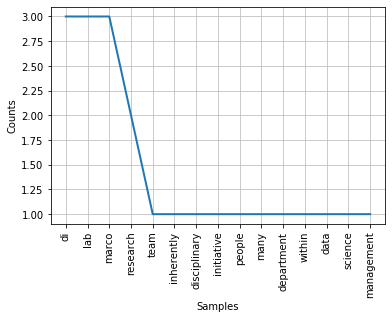

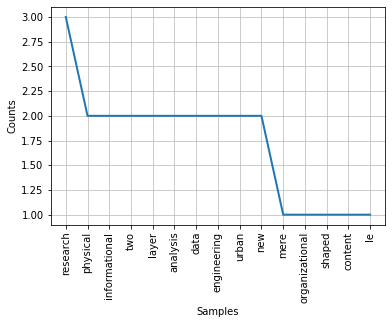

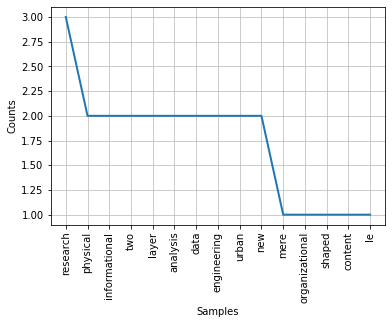

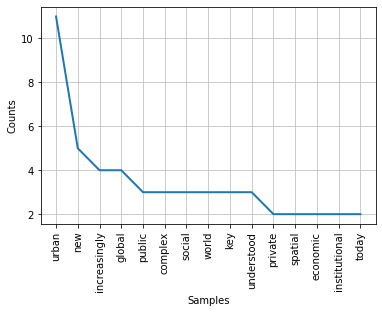

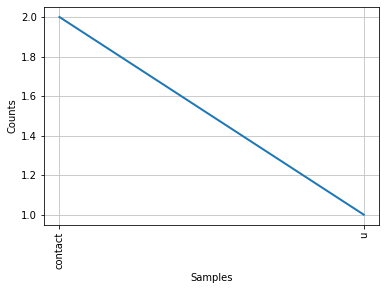

In [13]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts3[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [14]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

,Title,Freq_word
0,Team – Urbanscope,"{'team': 1, 'inherently': 1, 'disciplinary': 1..."
1,Urbanscope – A macroscope for urban systems,"{'mere': 1, 'physical': 2, 'organizational': 1..."
2,Urbanscope – A macroscope for urban systems,"{'mere': 1, 'physical': 2, 'organizational': 1..."
3,Mission – Urbanscope,"{'mission': 1, 'objective': 1, 'laboratory': 1..."
4,Contact – Urbanscope,"{'contact': 2, 'u': 1}"


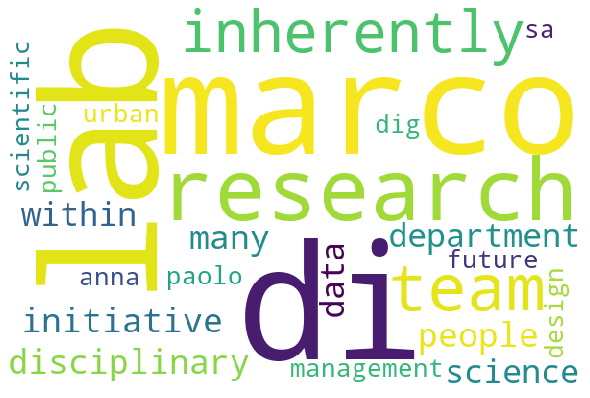

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[0]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

In [16]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)

str

In [17]:
tot_text=' '.join( [w for w in tot_text.split() if len(w)>1] )
tot_text = ''.join(i for i in tot_text if not i.isdigit())

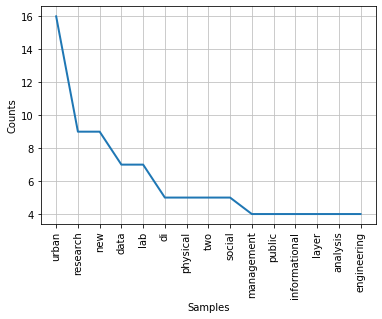

In [18]:
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

**salvo la stringa contenente il contenuto di tutte le pagine del sito in un file a parte**

In [19]:
textfile = open('PoliMi.txt', 'w')
textfile.write(tot_text)
textfile.close()

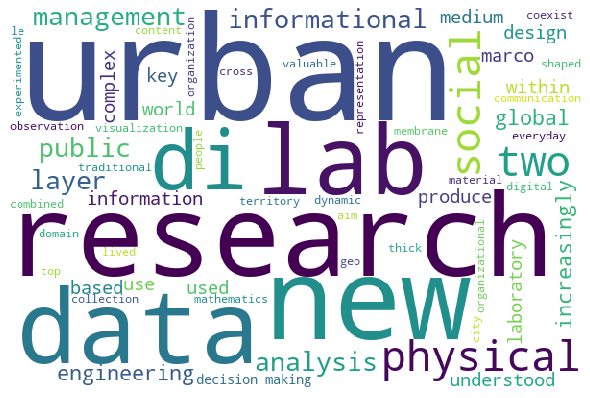

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()